ДОМАШНЯЯ РАБОТА №4 
Задание 2
Ходыка Анна

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

In [47]:
alpha=0.5 #коэффициент заболеваемости
beta = 0.3 #коэффициент выздоровления
N=1000000
S0=990000
I0 = 7000
R0 = 3000
t0=0
tf=25

Решить дифференциальное уравнение (2) и построить график функции S(t)S(t)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000012A00DD1760>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


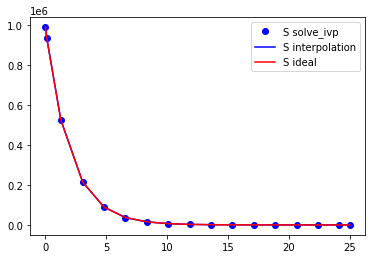

In [48]:
def dSdt(t, S):
    return -1*alpha*S

S_soln = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(S_soln)

t_s, S = S_soln.t, S_soln.y[0]
S_interp, = S_soln.sol(t_s)

plt.plot(t_s, S, 'o', color='b', label='S solve_ivp')
plt.plot(t_s, S_interp, color='blue', label='S interpolation')

# для проверки рисуем идеальную кривую по формуле из 5 домашки 
def S_func(t, S_koef, alpha_koef):
    return S_koef*np.exp(-alpha_koef*t)
S_ideal = S_func(t_s, S0, alpha)
plt.plot(t_s, S_ideal, color='red', label='S ideal')

plt.legend()
plt.show()

Решить дифференциальное уравнение (3) и построить график функции I(t)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000012A02C62EE0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08334945, 446699.01195032, 319077.83026358,
        165571.99129925,  71966.74863389,  29712.58392708,
         12130.57394067,   5009.75291427,   2075.26330119,
          1367.85128541]])
 y_events: None


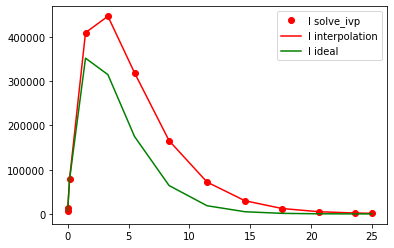

(13,)

In [49]:
def dIdt(t, I):
    return alpha*S_soln.sol(t) - beta*I

I_soln = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True)
print(I_soln)

t, I = I_soln.t, I_soln.y[0]
I_inetrp, = I_soln.sol(t)

# I -  зараженные индивиды (infected)
plt.plot(t, I, 'o', color='r', label='I solve_ivp')
plt.plot(t, I_inetrp, color='red', label='I interpolation')

# для проверки рисуем идеальную кривую по формуле из 5 домашки 
def I_func(t, S_koef, I_koef, alpha_koef):
    return (I_koef + alpha_koef*S_koef*t)*np.exp(-alpha_koef*t)

I_ideal = I_func(t, S0, I0, alpha)
plt.plot(t, I_ideal, color='green', label='I ideal')

plt.legend()
plt.show()

t.shape

Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interp1d) и построить график функции R(t)R(t)

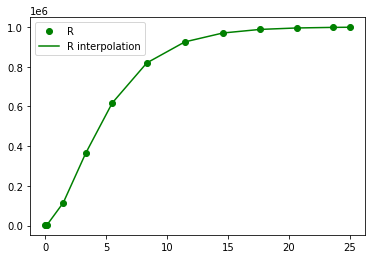

In [50]:
R = N-S_soln.sol(t)[0]-I

plt.plot(t, R, 'o', color='g', label='R')
R_interp = interp1d(t, R, kind='linear')
plt.plot(t, R_interp(t), color='green', label='R interpolation')
plt.legend()
plt.show()

Построить все три графика S(t)S(t), I(t)I(t) и R(t)R(t) на одной области отображения

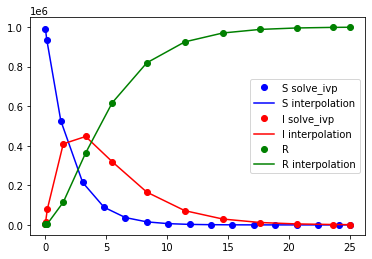

In [51]:
# визуализация
#S -  восприимчивы к данной болезни, но здоровы (susceptible) 
plt.plot(t_s, S, 'o', color='b', label='S solve_ivp')
plt.plot(t_s, S_interp, color='blue', label='S interpolation')

# I -  зараженные индивиды (infected)
plt.plot(t, I, 'o', color='r', label='I solve_ivp')
plt.plot(t, I_inetrp, color='red', label='I interpolation')

# R - здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) 
plt.plot(t, R, 'o', color='g', label='R')
plt.plot(t, R_interp(t), color='green', label='R interpolation')
plt.legend()
plt.show()